<a href="https://colab.research.google.com/github/AryanSinghSisodiya/Hands-On-Gradient-Boosting-with-XGBoost-and-Scikit-learn/blob/master/Grover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.0.2
%pip install qiskit_ibm_runtime
%pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 6.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=fe98c609db08ec595e60c56ce72ceb3ede3db0773375f357bada37f5b4c91529
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

Creating a multi-controlled ZGate

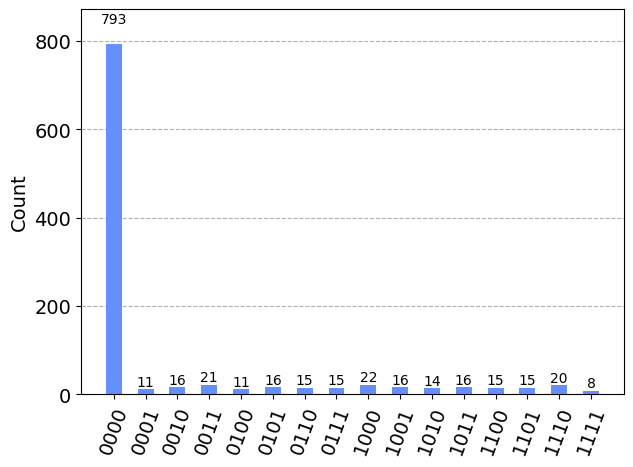

In [2]:
from qiskit.circuit.library.standard_gates import ZGate
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister,transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q,c)
qc.h(q)
qc.x(q)
cz_gate= ZGate().control(3)
qc.append(cz_gate,[0,1,2,3])
qc.x(q)
qc.h(q)
qc.measure(q,c)
simulator = Aer.get_backend('aer_simulator')

circuit_transpiled = transpile(qc, backend=simulator)
result = simulator.run(circuit_transpiled).result()
counts = result.get_counts(circuit_transpiled)

plot_histogram(counts)

Applying the Grover's Search

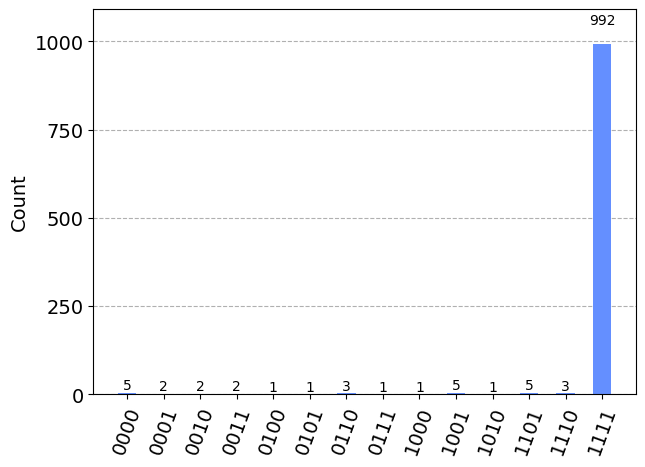

In [3]:
q1 = QuantumRegister(4)
c1 = ClassicalRegister(4)
qc1= QuantumCircuit(q1,c1)
cz_gate= ZGate().control(3)

qc1.h(q1)
for i in range(3):
    qc1.append(cz_gate,[0,1,2,3])
    qc1.h(q1)
    qc1.x(q1)
    qc1.append(cz_gate,[0,1,2,3])
    qc1.x(q1)
    qc1.h(q1)
qc1.draw('mpl')

qc1.measure(q1,c1)
circuit_transpiled_1 = transpile(qc1, backend=simulator)
result_1 = simulator.run(circuit_transpiled_1).result()
counts_1 = result_1.get_counts(circuit_transpiled_1)

plot_histogram(counts_1)

Diffusion Operator

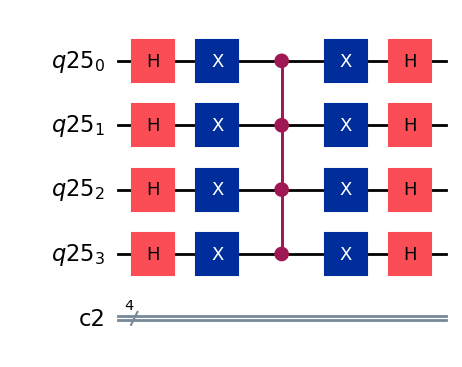

In [4]:
q2 = QuantumRegister(4)
c2 = ClassicalRegister(4)
qc2= QuantumCircuit(q2,c2)
qc2.h(q2)
qc2.x(q2)
qc2.append(cz_gate,[0,1,2,3])
qc2.x(q2)
qc2.h(q2)
qc2.draw('mpl')